In [1]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *



processGens=ProcessGens()

#wmt modes

process_gen_modes=["wmt_samples3", "wmt_samples0", "wmt_samples1", "wmt_samples2_1","wmt_samples2_2"]

processGens.init_with_mode(process_gen_modes)
root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric = processGens.get_params()
examples_df, completions_df=get_dfs(processGens)


dfs_by_model={}
for model_name in examples_df['model'].unique():
    filtered_df = examples_df[examples_df["model"]==model_name]
    dfs_by_model[model_name]=filtered_df
all_dfs_by_model=dfs_by_model


/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch version 2.6.0 available.


Init: process_gens_mode ['wmt_samples3', 'wmt_samples0', 'wmt_samples1', 'wmt_samples2_1', 'wmt_samples2_2']
calculate_gen_summary_dict
snellius_copies/helm_output/sample_100_eval_500_first_inst_0/wmt_14_language_pair_de_en_/meta_llama_Llama_3.2_1B_Instruct/1_beams/runs/sample_100_eval_500_first_inst_0
snellius_copies/helm_output/sample_100_eval_500_first_inst_0/wmt_14_language_pair_de_en_/allenai_OLMo_2_1124_7B_SFT/1_beams/runs/sample_100_eval_500_first_inst_0
snellius_copies/helm_output/sample_100_eval_500_first_inst_0/wmt_14_language_pair_de_en_/allenai_OLMo_2_1124_7B_DPO/1_beams/runs/sample_100_eval_500_first_inst_0
snellius_copies/helm_output/sample_100_eval_500_first_inst_0/wmt_14_language_pair_de_en_/allenai_OLMo_2_1124_13B_DPO/1_beams/runs/sample_100_eval_500_first_inst_0
snellius_copies/helm_output/sample_100_eval_500_first_inst_0/wmt_14_language_pair_de_en_/allenai_OLMo_2_1124_13B_SFT/1_beams/runs/sample_100_eval_500_first_inst_0
snellius_copies/helm_output/sample_100_eval_50

In [2]:
# print(f"\t root_folder: {root_folder} \n \t num_beams_list {num_beams_list} \n \t models: {models} \n \t custom_metrics{[metric.name() for metric in custom_metrics]}"+ 
#     f"\n \t task_names {task_names} \n \t suite_name {suite_name} \n \t instance_metrics {instance_metrics}")
# # instanceGeneration=get_first(processGens.first_run_instances)
# print(examples_df.head(2))
# print("num examples" ,len(examples_df))
# print("num_completions", len(completions_df))
# print(f"compare_metric mean: ",examples_df[[compare_metric]].mean())
# #current belief: for each run_folder combo, there will be 100 instances and 100 examples per instance

/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["rank"]=100-filtered_df["example_idx"]
/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["rank"]=100-filtered_df["example_idx"]
/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

meta_llama_Llama_3.2_1B_Instruct
allenai_OLMo_2_1124_7B_SFT
allenai_OLMo_2_1124_7B_DPO
allenai_OLMo_2_1124_13B_DPO


/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["rank"]=100-filtered_df["example_idx"]
/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["rank"]=100-filtered_df["example_idx"]
/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

allenai_OLMo_2_1124_13B_SFT
meta_llama_Llama_3.2_1B
meta_llama_Llama_3.1_8B


/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["rank"]=100-filtered_df["example_idx"]
/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["rank"]=100-filtered_df["example_idx"]
/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

allenai_OLMo_2_0425_1B
allenai_OLMo_2_1124_7B
allenai_OLMo_2_1124_13B
allenai_OLMo_2_0425_1B_Instruct


/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["rank"]=100-filtered_df["example_idx"]
/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["rank"]=100-filtered_df["example_idx"]
/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_52063/2318670137.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

meta_llama_Llama_3.1_8B_Instruct
allenai_OLMo_2_1124_7B_Instruct
allenai_OLMo_2_1124_13B_Instruct


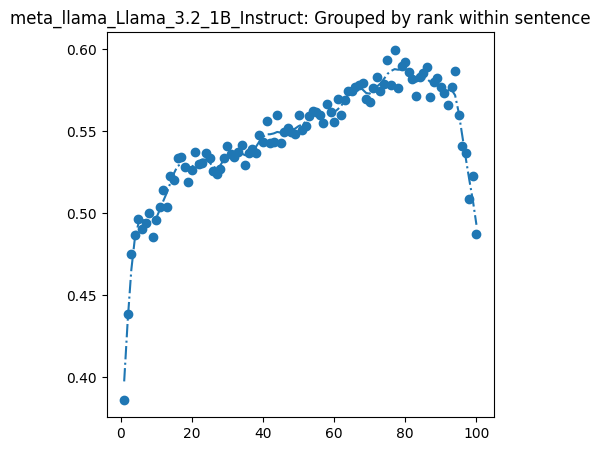

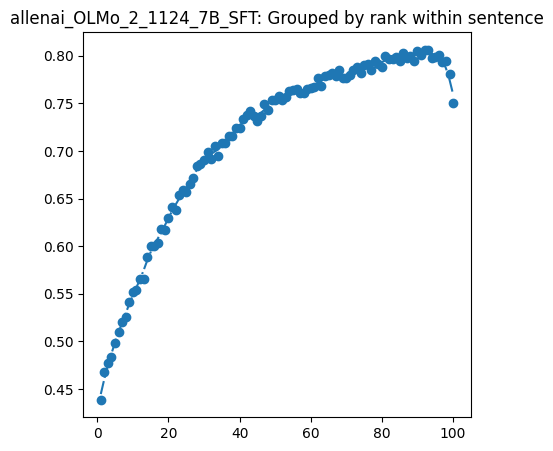

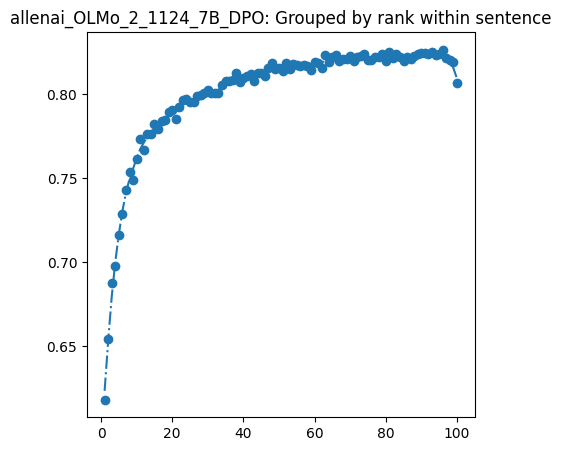

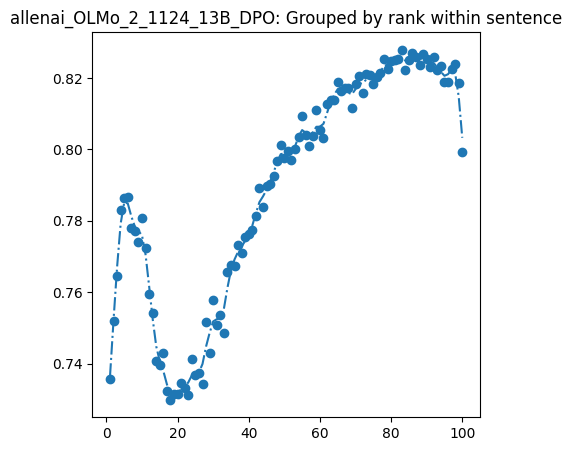

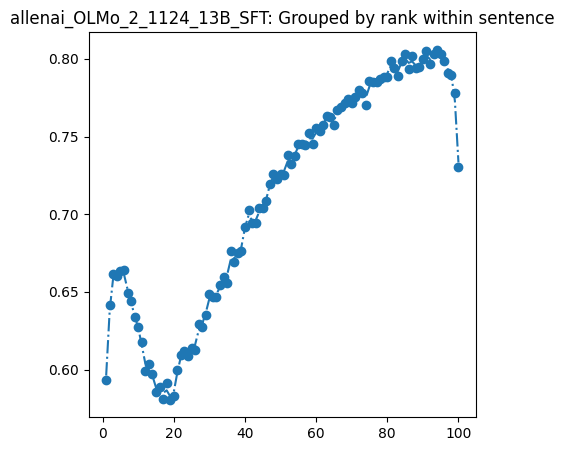

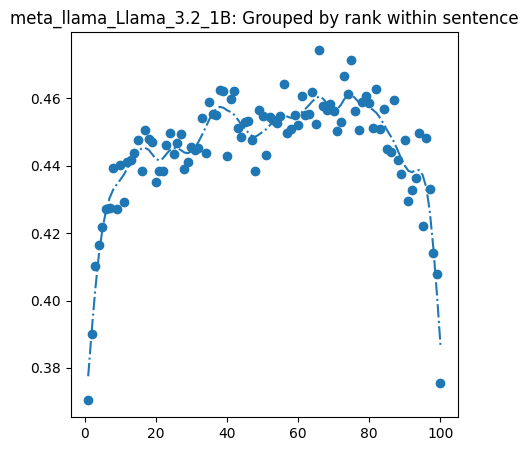

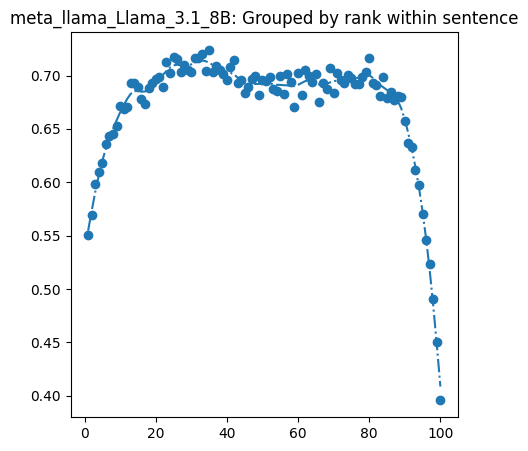

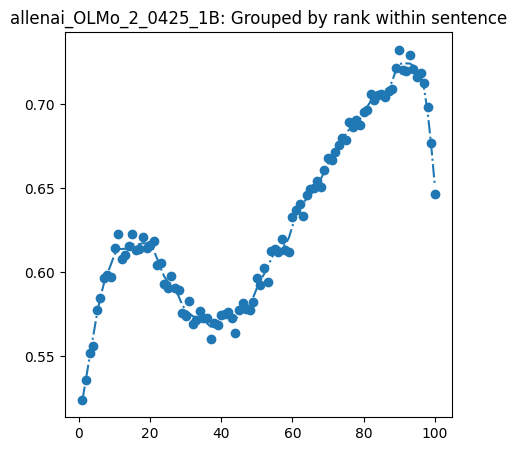

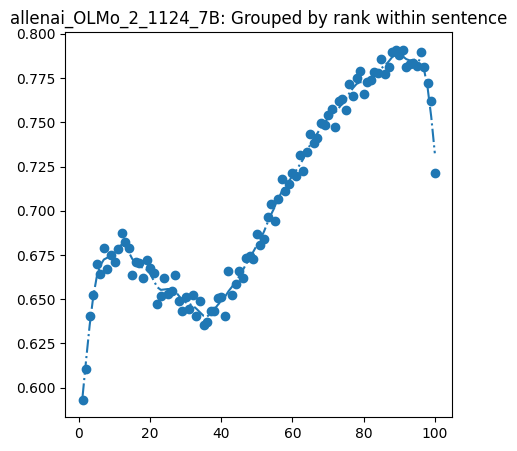

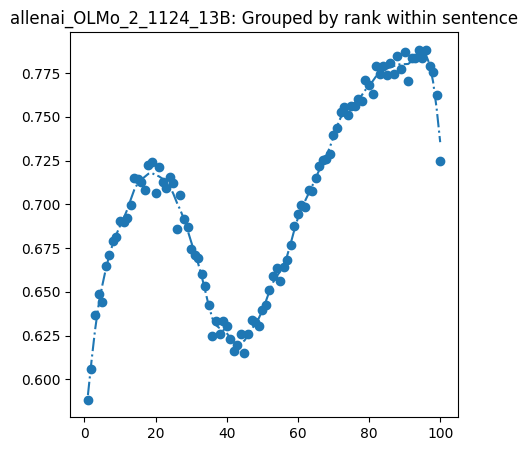

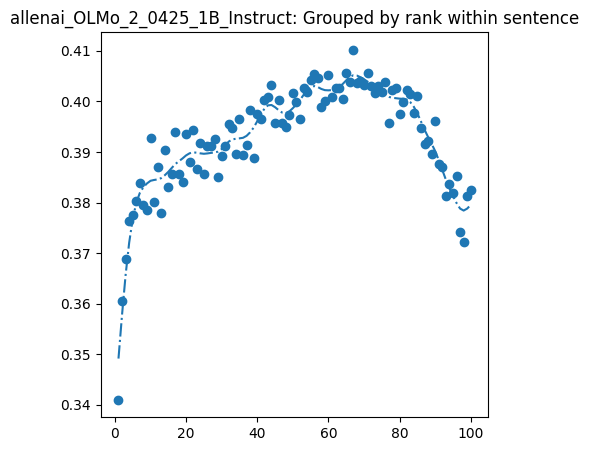

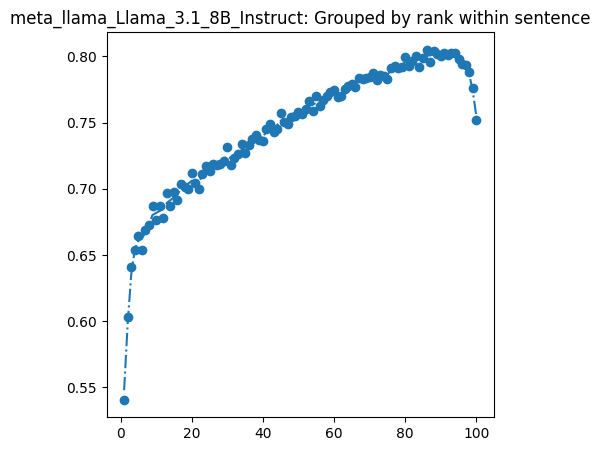

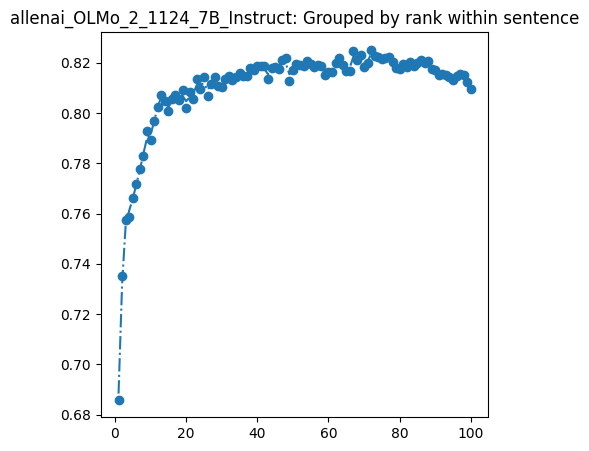

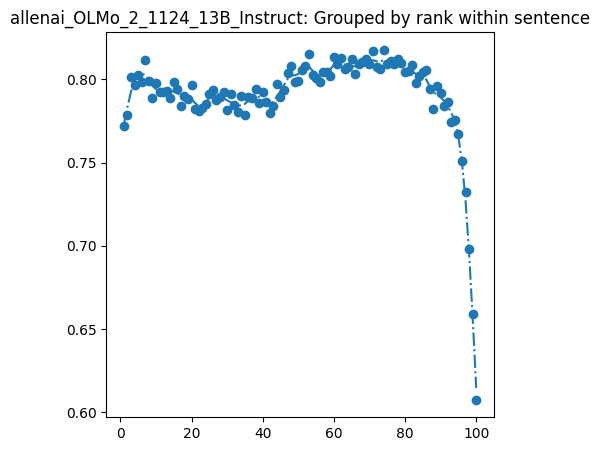

In [39]:

max_example_idx = examples_df["example_idx"].max()
plots_wide=1
num_models=len(dfs_by_model.keys())
plots_tall=math.ceil(num_models/plots_wide)

suptitle=""
axs=None
fig=None


for idx, (model_name, filtered_df) in enumerate(dfs_by_model.items()):
    filtered_df["rank"]=100-filtered_df["example_idx"]
    if axs is None:
        ax=None
    else:
        title=model_name
        if(num_models>1):
            axs_x=idx % plots_wide
            axs_y= math.floor(idx / plots_wide)
            ax=axs[axs_x, axs_y]
        else:
            ax=axs

    
    def calculate_title():
        return f"{model_name}: {suptitle}" if ax is None else model_name
    # plot by rank within sentence
    suptitle="Grouped by rank within sentence"
    plot_smooth_spline(df=filtered_df, xlabel="rank",groupby='example_idx', ylabel=compare_metric, title=calculate_title(), ax=ax)   
if fig is not None:
    fig.suptitle(title)
    fig.tight_layout()
    

In [66]:

def get_model_details(model_name):


    info_dict={
        #olmo
        "allenai_OLMo_2_0425_1B_Instruct":{"size": 1, "suite":  "olmo","model_type":"instruct", "name":"Olmo 1B Instruct"},
        "allenai_OLMo_2_0425_1B":{"size": 1, "suite":  "olmo","model_type":"base", "name":"Olmo 1B Base"},

        "allenai_OLMo_2_1124_7B_Instruct":{"size": 7, "suite":  "olmo","model_type":"instruct", "name":"Olmo 7B Instruct" },
        "allenai_OLMo_2_1124_7B":{"size": 7, "suite":  "olmo","model_type":"base", "name":"Olmo 7B Base" },

        "allenai_OLMo_2_1124_13B_Instruct":{"size": 13, "suite":  "olmo","model_type":"instruct", "name":"Olmo 13B Instruct" },
        "allenai_OLMo_2_1124_13B":{"size": 13, "suite":  "olmo","model_type":"base", "name":"Olmo 13B Base" },

        #llama instruct
        "meta_llama_Llama_3.2_1B_Instruct":{"size": 1, "suite": "llama","model_type":"instruct",  "name":"Llama 1B Instruct"},
        "meta_llama_Llama_3.2_1B":{"size": 1, "suite": "llama","model_type":"base",  "name":"Llama 1B Base"},

        "meta_llama_Llama_3.1_8B_Instruct":{"size": 8, "suite": "llama","model_type":"instruct",  "name":"Llama 8B Instruct"},
        "meta_llama_Llama_3.1_8B":{"size": 8, "suite": "llama","model_type":"base",  "name":"Llama 8B Base"},

        


        "meta-llama/Meta-Llama-3-70B-Instruct":{"size": 70, "suite": "llama","model_type":"instruct",  "name":"Llama 70B Instruct"},
        "allenai/OLMo-2-0325-32B-Instruct":{"size": 32, "suite": "olmo","model_type":"base",  "name":"Olmo 32 Base"},

        # #compare types
        "allenai_OLMo_2_1124_7B_DPO":{"size": 7, "suite":  "olmo","model_type":"dpo", "name":"Olmo 7B DPO" },
        "allenai_OLMo_2_1124_7B_SFT":{"size": 7, "suite":  "olmo","model_type":"sft", "name":"Olmo 7B SFT" },

        "allenai_OLMo_2_1124_13B_DPO":{"size": 13, "suite":  "olmo","model_type":"dpo", "name":"Olmo 13B DPO" },
        "allenai_OLMo_2_1124_13B_SFT":{"size": 13, "suite":  "olmo","model_type":"sft", "name":"Olmo 13B SFT" },
    }
    
    return info_dict[model_name]


In [67]:

# #compare sizes
# ["meta_llama_Llama_3.2_1B_Instruct","meta_llama_Llama_3.1_8B"]
# ["allenai_OLMo_2_0425_1B","allenai_OLMo_2_1124_7B", "allenai_OLMo_2_1124_13B"]

# #compare types
# ["allenai_OLMo_2_1124_13B", "allenai_OLMo_2_1124_13B_Instruct", "allenai_OLMo_2_1124_13B_DPO", "allenai_OLMo_2_1124_13B_SFT"]
# ["allenai_OLMo_2_1124_7B", "allenai_OLMo_2_1124_7B_Instruct", "allenai_OLMo_2_1124_7B_DPO", "allenai_OLMo_2_1124_7B_SFT"]

# #base vs instruct
# [( "meta_llama_Llama_3.2_1B","meta_llama_Llama_3.2_1B_Instruct")
# ("meta_llama_Llama_3.1_8B","meta_llama_Llama_3.1_8B") 
# ("allenai_OLMo_2_0425_1B","allenai_OLMo_2_0425_1B"),
# ("allenai_OLMo_2_1124_7B","allenai_OLMo_2_1124_7B"),
# ("allenai_OLMo_2_1124_13B","allenai_OLMo_2_1124_13B")]





from scipy.interpolate import make_smoothing_spline
def plot_smooth_spline(df, xlabel, ylabel, groupby='example_idx', title=None, trend_line="None",ax=None, nbins=20, error_bar=False, figsize=None):
    if(ax is None):
        print("AX IS NONE!!")

        figsize=(5, 5) if figsize is None else FloatingPointError
        _, ax = plt.subplots(figsize=figsize)
    warnings.simplefilter(action='ignore', category=FutureWarning)
    if(groupby=="bins"):
        
        df["bins"]=pd.qcut(df[xlabel],nbins)
    
    grouped = df.groupby(groupby)[[xlabel, ylabel]].agg(['mean', 'count', 'std'])
    
    grouped = grouped.sort_values(by=(xlabel, 'mean'))

    x = grouped[(xlabel, 'mean')].values
    y = grouped[(ylabel, 'mean')].values
    

    yerr = grouped[(ylabel, 'std')].values
    yerr=[]
    for i in grouped.index:
        # print(grouped.loc[i][ylabel])
        _, c, s = grouped.loc[i][ylabel]
        yerr.append(1.96*s/math.sqrt(c))

    # Plot with error bars (standard deviation)

    if(error_bar):
        ax.errorbar(x, y, yerr=yerr, fmt='o', ecolor='gray', capsize=3, label='Data with std dev')
    else:
        ax.scatter(x,y)
    spl = make_smoothing_spline(x, y)
    ax.plot(x, spl(x), '-.')
    if title:
        ax.set_title(title)


def qualitative_plots(models_array, axes):
    for row, suite_models in enumerate(models_array):
        for col, model_name in enumerate(suite_models):
            print(f"model_name is {model_name}")
            ax=axes[row][col]
            filtered_df=dfs_by_model[model_name]
            def calculate_title():
                readable_model=get_model_details(model_name)['name']
                return f"{readable_model}: {suptitle}" if ax is None else readable_model
            # plot by rank within sentence
            suptitle="Grouped by rank within sentence"
            plot_smooth_spline(df=filtered_df, xlabel="rank",groupby='example_idx', ylabel=compare_metric, title=calculate_title(), ax=ax, figsize=(30,30))   
    plt.tight_layout()






model_name is meta_llama_Llama_3.2_1B_Instruct
model_name is meta_llama_Llama_3.1_8B_Instruct
model_name is allenai_OLMo_2_0425_1B_Instruct
model_name is allenai_OLMo_2_1124_7B_Instruct
model_name is allenai_OLMo_2_1124_13B_Instruct


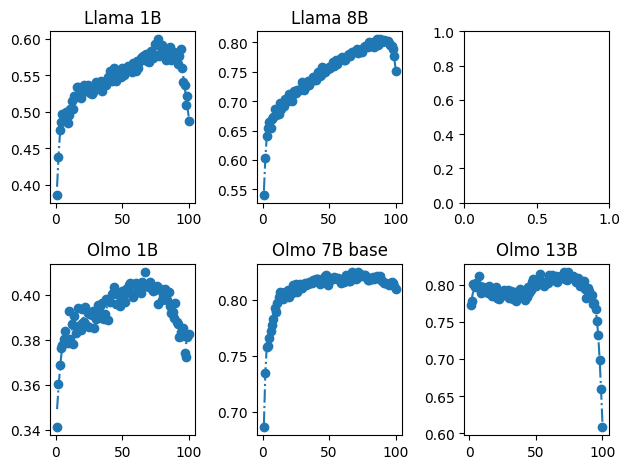

In [70]:

size_array=[["meta_llama_Llama_3.2_1B_Instruct","meta_llama_Llama_3.1_8B_Instruct"],
["allenai_OLMo_2_0425_1B_Instruct","allenai_OLMo_2_1124_7B_Instruct", "allenai_OLMo_2_1124_13B_Instruct"]]
_, axes=plt.subplots(nrows=2, ncols=3)
qualitative_plots(size_array, axes)


model_name is allenai_OLMo_2_1124_13B
model_name is allenai_OLMo_2_1124_13B_SFT
model_name is allenai_OLMo_2_1124_13B_DPO
model_name is allenai_OLMo_2_1124_13B_Instruct
model_name is allenai_OLMo_2_1124_7B
model_name is allenai_OLMo_2_1124_7B_SFT
model_name is allenai_OLMo_2_1124_7B_DPO
model_name is allenai_OLMo_2_1124_7B_Instruct


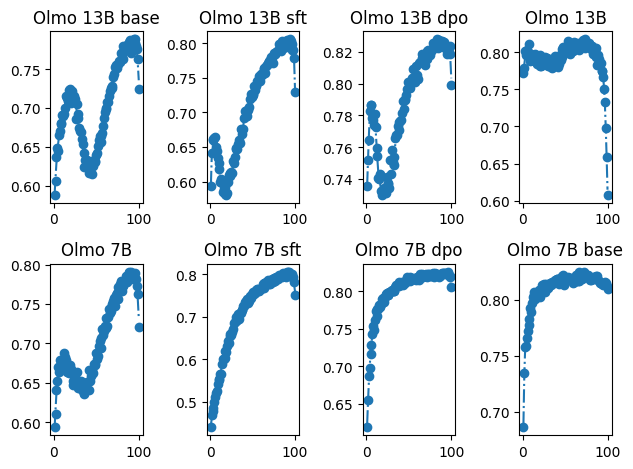

In [72]:
types_array=[["allenai_OLMo_2_1124_13B",  "allenai_OLMo_2_1124_13B_SFT",   "allenai_OLMo_2_1124_13B_DPO","allenai_OLMo_2_1124_13B_Instruct"],
             ["allenai_OLMo_2_1124_7B", "allenai_OLMo_2_1124_7B_SFT", "allenai_OLMo_2_1124_7B_DPO",  "allenai_OLMo_2_1124_7B_Instruct"]]
_, axes=plt.subplots(nrows=2, ncols=4)
qualitative_plots(types_array, axes)
